# **Question 1 - Main Objective**
- Given gender, marital status, number of dependents, education status, property area, presence of credit history, coapplicant income, loan amount and loan amount term, how accurately can we predict the outcome of loan status?
- using decision tree, neural network and naive bayes

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Prepare data for training and test



In [96]:
#import X and y from data_cleaning.ipynb
%store -r X
%store -r y


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.head())
print(y_train.head())

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Gender_Female  \
479             0.2812      0.5651            0.7436              0   
419             0.2486      0.5243            0.7436              0   
66              0.3954      0.4660            0.3590              0   
376             0.8763      0.4854            0.7436              0   
29              0.3654      0.4369            0.7436              1   

     Gender_Male  Married_No  Married_Yes  Dependents_0  Dependents_1  \
479            1           0            1             0             0   
419            1           0            1             1             0   
66             1           1            0             1             0   
376            1           0            1             0             0   
29             0           1            0             0             0   

     Dependents_2  Dependents_3+  Education_Graduate  Education_Not Graduate  \
479             1              0                   1  

# **Decision Tree**

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

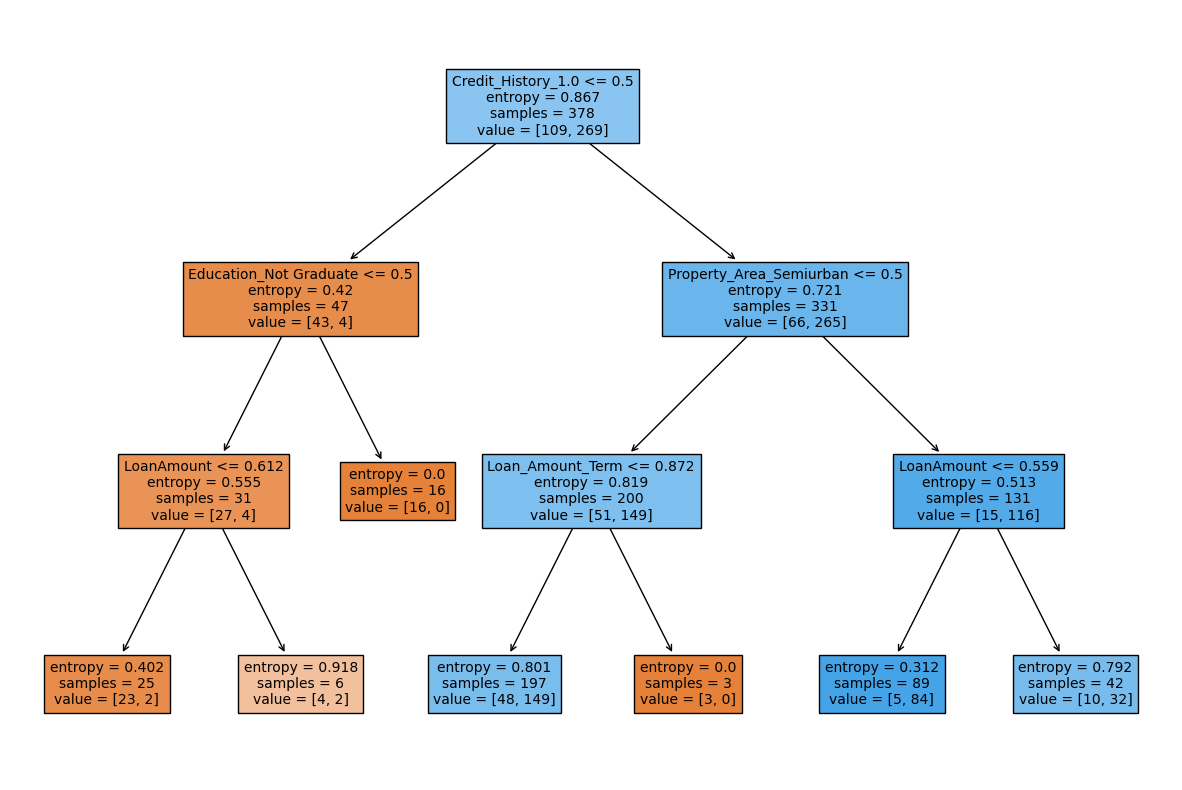

-----------

[[ 32  24]
 [  2 105]]


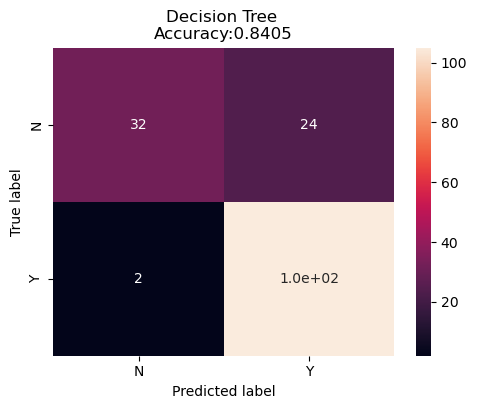

In [99]:
#Visualize the tree with features name
from sklearn import tree
features = X.columns
class_names = ['N', 'Y']
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

#Predict the test set results
y_pred = dt.predict(X_test)

#Creates confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("-----------\n")
print(cm)

#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['N', 'Y'], columns = ['N', 'Y'])

#Print confusion matrix as heatmap
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Decision Tree \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



# **Naive Bayes**

In [100]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

              precision    recall  f1-score   support

           N       0.97      0.59      0.73        56
           Y       0.82      0.99      0.90       107

    accuracy                           0.85       163
   macro avg       0.90      0.79      0.82       163
weighted avg       0.87      0.85      0.84       163

-----------

[[ 33  23]
 [  1 106]]


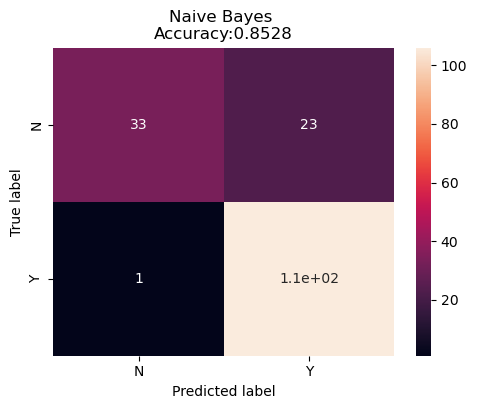

In [101]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Creates confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("-----------\n")
print(cm)

#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['N', 'Y'], columns = ['N', 'Y'])

#Print confusion matrix as heatmap
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Naive Bayes \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# **Neural Network**

In [102]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim = 18, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))

#transform Y, N to 0, 1
y_train = y_train.replace({'N':0, 'Y':1})
y_test = y_test.replace({'N':0, 'Y':1})

In [103]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.6958
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7116
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7116
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7143
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7434
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.8042
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8122
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8148
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8175
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8148
Epoch 11/

In [104]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("\n")

6/6 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8221
Test loss:  0.5307735800743103
Test accuracy:  0.8220859169960022


